In [12]:
import numpy as np
import random as r
from IPython.utils.tests.test_wildcard import y
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
%matplotlib inline
import matplotlib.pyplot as plt
r.seed(0)

In [13]:
num_examples = 300
y = np.random.normal(size=(num_examples, 1))
y = np.cumsum(y).reshape(num_examples, 1)
x = np.random.normal(size=(num_examples, 1))
x = np.hstack((x, np.random.exponential(size=(num_examples, 1))))
x = np.hstack((x, np.random.poisson(lam=10, size=(num_examples, 1))))
# x = np.hstack((x, np.arange(num_examples, dtype='float32').reshape(num_examples)))
x = np.sort(x, axis=0)
# print(x[:, 2, -1])
x[:, 2] = x[:, 2][:: -1]

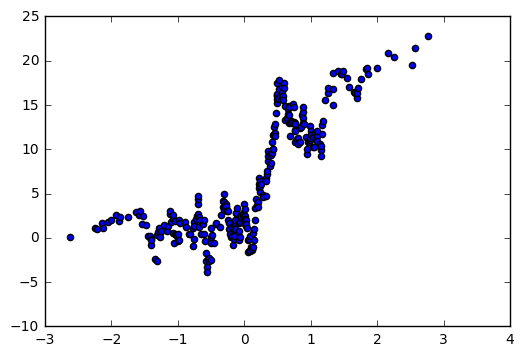

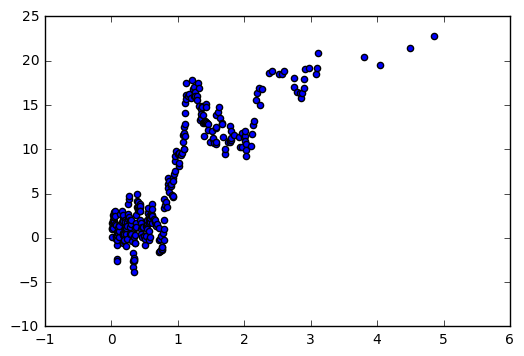

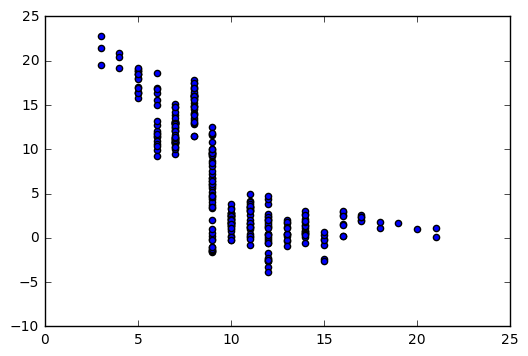

In [14]:
for i in range(0, x.shape[1]):
    plt.scatter(x[:, i], y)
    plt.show()

In [46]:
def standardize(x):
    res = np.full(shape=x.shape, fill_value=0, dtype='float64')
    for i in range(int(x.shape[1])):
        x_col = x[:, i]
        res[:, i] = (x_col - np.mean(x_col)) / np.std(x_col)
    return res

Theta:
 [[ 6.83355515]
 [ 1.85865946]
 [ 4.56105848]
 [ 0.33162469]] 



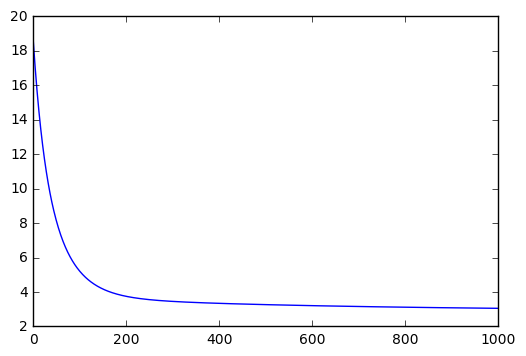

In [75]:
class LinearRegressionNP():
    def __init__(self, batch_size=32):
        self.batch_size = batch_size
        self.theta = np.array([])
        self.cost_function_values = []

    def clear(self):
        self.theta = np.array([])
        self.cost_function_values = []

    def fit(self, x, y, alpha=0.01):
        self.clear()
        m, n = x.shape
        random_idxs = np.arange(int(m / self.batch_size)*self.batch_size)
        np.random.shuffle(random_idxs)
        random_idxs = random_idxs.reshape((int(m / self.batch_size), self.batch_size))
        # Нормализуем
        x_std = standardize(x)
        # добвляем единицу вначале
        # h(x) = O_0 * (1) + O_1 * x_1 + ...
        x_std = np.hstack((np.ones((m, 1)), x_std))

        self.theta = np.random.rand(n + 1, 1)

        for e in range(1000):
            epoch_loses = []
            for idxs in random_idxs:
                x_std_sel = x_std[idxs]
                
                pred = x_std_sel @ self.theta
                error = pred - y[idxs]
                cost = error ** 2
                self.theta -= (alpha/m) * x_std_sel.T @ error
                epoch_loses.append(cost / len(idxs))
            if epoch_loses:
                self.cost_function_values.append(np.sum(epoch_loses) / x_std_sel.shape[0])

    def predict(self, x):
        if self.theta.shape[0]:
            x_prep = np.hstack((1, x))
            pred = x_prep @ self.theta
            return pred
        else:
            return False
    
regression = LinearRegressionNP()
regression.fit(x, y, 0.01)
print('Theta:\n', regression.theta, '\n')
plt.plot(regression.cost_function_values)
plt.show()

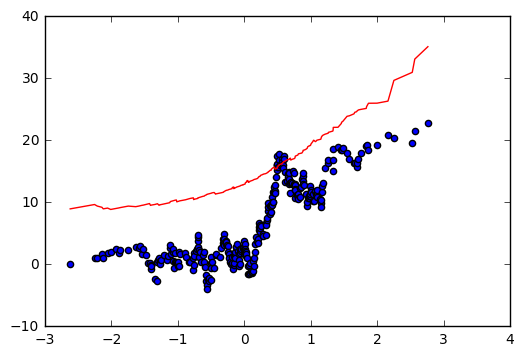

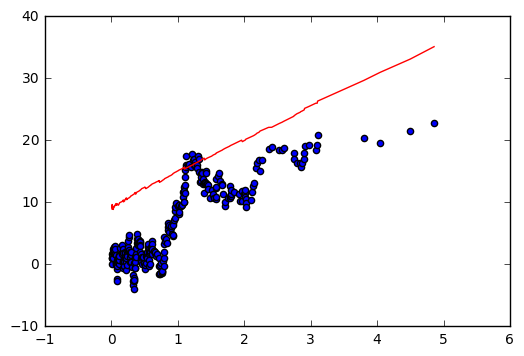

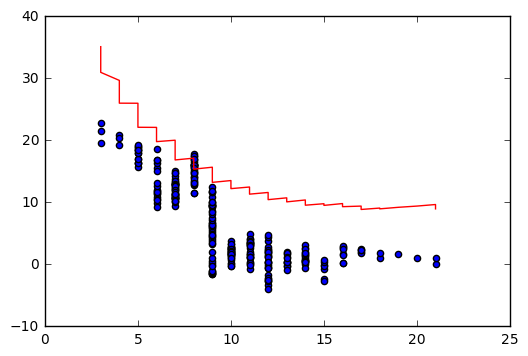

In [76]:
pred = list()
for row in x:
    pred.append(regression.predict(row))
for i in range(x.shape[1]):
    plt.scatter(x[:, i], y)
    plt.plot(x[:, i], pred, color='red')
    plt.show()